In [54]:
#import the all necessary libraries

import pandas as pd
import numpy as np

In [53]:
#Load the dataset

df =  pd.read_csv("Fast Food Dataset.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.shape

(1453, 15)

In [6]:
df.isnull()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [10]:
df['yummy'].value_counts()


Yes    803
No     650
Name: yummy, dtype: int64

In [11]:
df['Like'].value_counts()

3               229
2               187
0               169
4               160
1               152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [12]:
MD_x = df.iloc[:, 0:11].copy()
MD_x = (MD_x == "Yes").astype(int)
result = round(MD_x.mean(), 2)

In [13]:
result

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [15]:
scaler = StandardScaler()
MD_x_standardized = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x_standardized)

# Print summary
print("Explained Variance Ratio:")
print(MD_pca.explained_variance_ratio_)
print("\nSummary of PCA:")
print(pd.DataFrame({'Standard deviation': np.sqrt(MD_pca.explained_variance_),'Proportion of Variance': MD_pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)}))

Explained Variance Ratio:
[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]

Summary of PCA:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             1.677250                0.255566               0.255566
1             1.277868                0.148348               0.403914
2             1.175207                0.125469               0.529383
3             1.040053                0.098270               0.627653
4             0.958620                0.083484               0.711136
5             0.884613                0.071091               0.782227
6             0.845774                0.064986               0.847213
7             0.769870                0.053845               0.901058
8             0.724065                0.047628               0.948686
9             0.554809                0.027964               0.976650
10            0.506983                0.023350               1.

In [16]:
# Assuming MD_pca is your PCA object from the previous example
# Replace it with the actual name of your PCA object if different

# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(np.sqrt(MD_pca.explained_variance_), 1))

# Print rotation matrix
print("\nRotation (n x k) = (11 x 11):")
rotation_matrix = pd.DataFrame(MD_pca.components_.T, columns=[f'PC{i+1}' for i in range(MD_pca.components_.shape[0])])
print(rotation_matrix)

Standard deviations (1, .., p=11):
[1.7 1.3 1.2 1.  1.  0.9 0.8 0.8 0.7 0.6 0.5]

Rotation (n x k) = (11 x 11):
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -0.406955  0.282615 -0.259588  0.026237  0.346857 -0.124916  0.159878   
1  -0.308827 -0.045682 -0.317151 -0.009424 -0.437148  0.188966 -0.661814   
2  -0.023320  0.069982  0.020170  0.845496 -0.185551  0.438661  0.214188   
3   0.177861 -0.205590 -0.608077 -0.023396  0.086934  0.107520 -0.023851   
4   0.267796 -0.136300 -0.389568  0.330854  0.343713 -0.278329 -0.307300   
5  -0.213039 -0.282441 -0.211395  0.090363 -0.568939 -0.572734  0.392436   
6  -0.289134 -0.575032  0.125157  0.114477  0.256981  0.020657 -0.008895   
7  -0.426115  0.242199 -0.269648  0.072691  0.286099 -0.053053  0.197364   
8   0.290944  0.567528 -0.183298  0.035510 -0.207362 -0.171160  0.015198   
9  -0.266839  0.201031  0.367814  0.301990  0.051787 -0.446166 -0.449446   
10  0.410744 -0.143888  0.090299  0.235231  0.105843

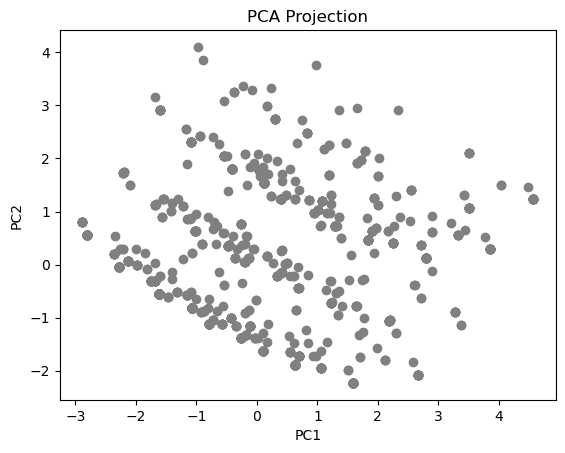

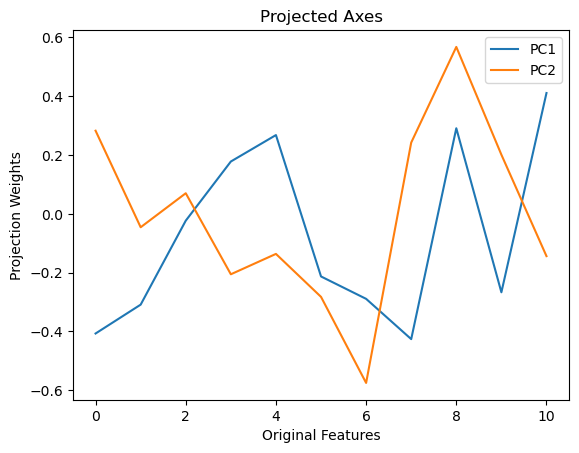

In [17]:
import matplotlib.pyplot as plt

# Assuming MD_pca is your PCA object from the previous example
# Replace it with the actual name of your PCA object if different

# Transform the data using the first two principal components
MD_pca_transformed = MD_pca.transform(MD_x_standardized)

# Plot the transformed data
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

# Plot projected axes
plt.figure()
plt.plot(MD_pca.components_[0, :], label='PC1')
plt.plot(MD_pca.components_[1, :], label='PC2')
plt.xlabel('Original Features')
plt.ylabel('Projection Weights')
plt.title('Projected Axes')
plt.legend()
plt.show()

In [18]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming MD_x is your binary matrix from the previous example
# Replace it with the actual name of your binary matrix if different

# Set seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering for k=2 to k=8 with 10 repetitions
results = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    results.append(kmeans)

# Choose the best result based on inertia or other criteria
# You may want to customize the selection based on your specific criteria
best_kmeans = results[3]  # For example, choosing k=5

# Relabel the clusters
labels = best_kmeans.labels_

# Print the cluster assignments
print(labels)

C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

[4 2 2 ... 2 1 0]


C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


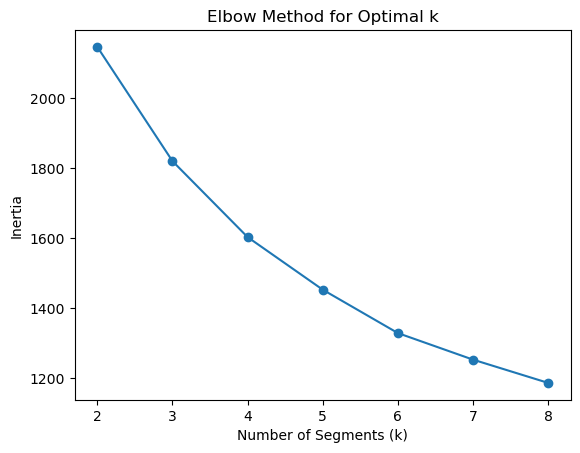

In [19]:
import matplotlib.pyplot as plt

# Assuming best_kmeans is your selected k-means result from the previous example
# Replace it with the actual name of your k-means result if different

# Plot the clustering results for each k
inertia_values = [kmeans.inertia_ for kmeans in results]

plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

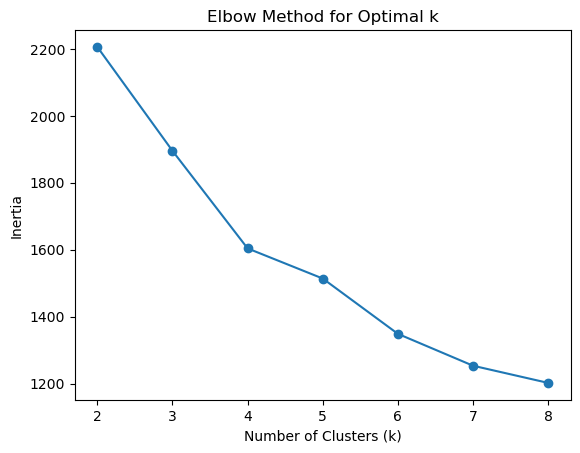

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_x is your binary matrix from the previous example
# Replace it with the actual name of your binary matrix if different

# Set seed for reproducibility
np.random.seed(1234)

# Perform bootstrapping for k=2 to k=8 with 10 repetitions and 100 bootstraps
inertia_values = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
MD_x = df.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


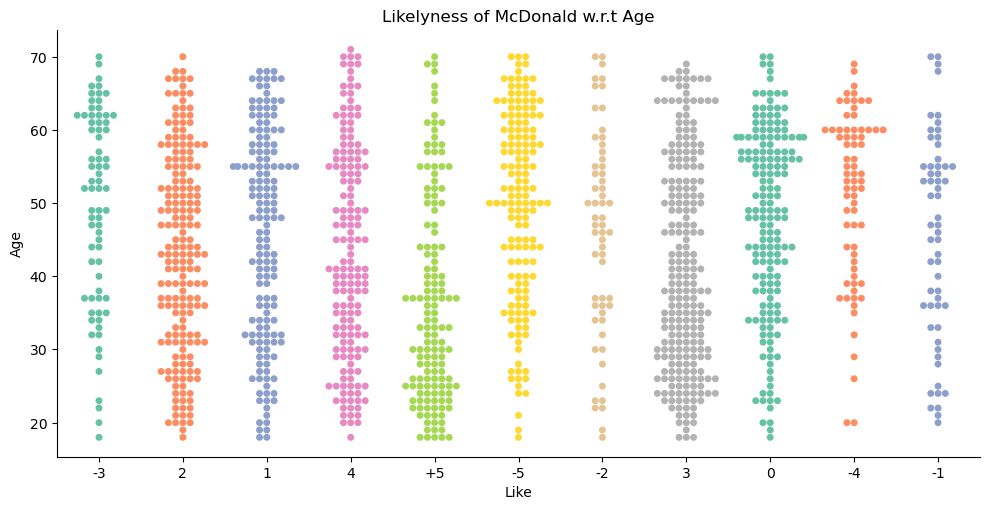

In [22]:
#Customer segmentation - based on pyschographic segmentation
import seaborn as sns
#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=df,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [23]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male


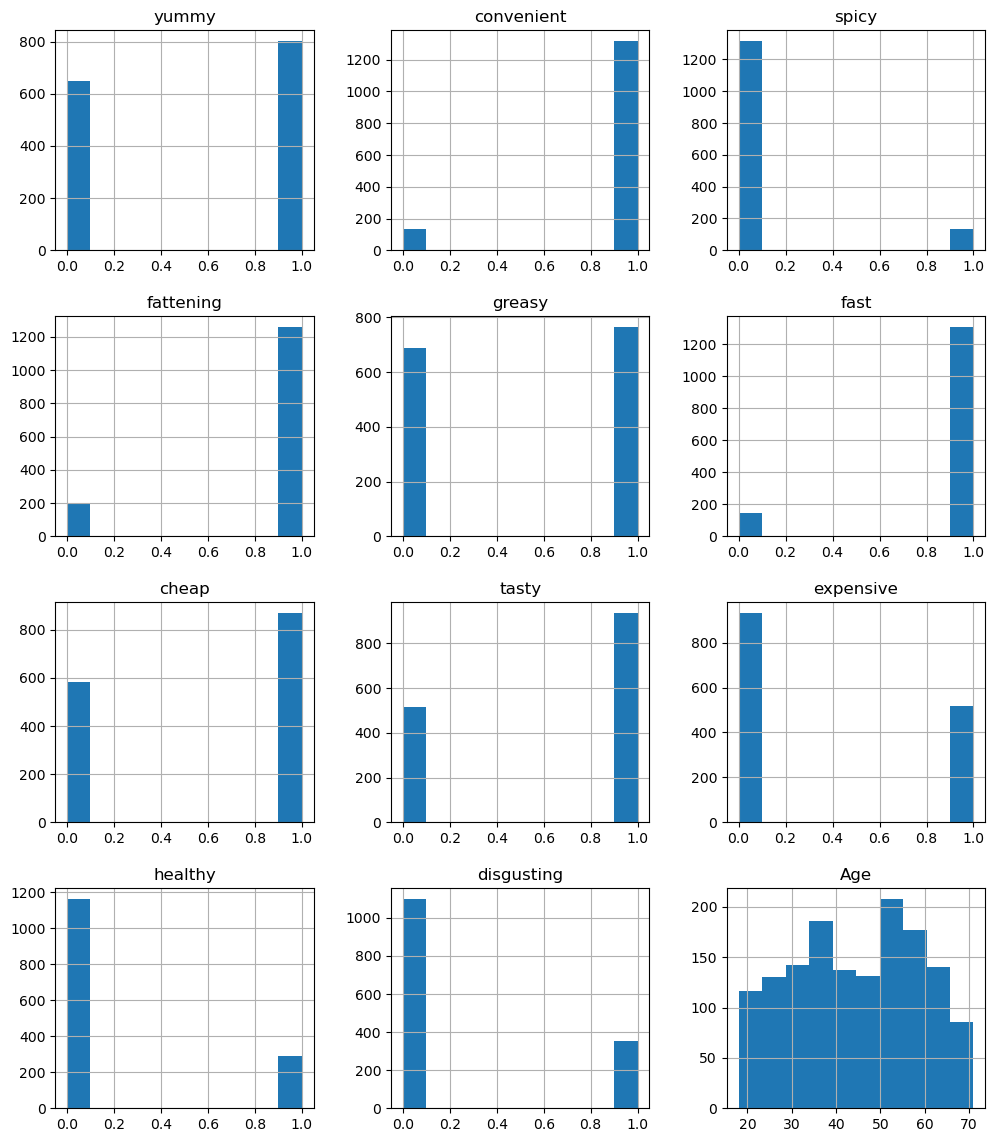

In [24]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [25]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [26]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

## PCA 

In [27]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25556637, 0.40391399, 0.52938308, 0.62765279, 0.71113635,
       0.78222737, 0.84721295, 0.90105773, 0.94868581, 0.9766496 ,
       1.        ])

In [29]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df_eleven is your DataFrame
pca = PCA()
pca.fit(df_eleven)

# Get loadings and number of principal components
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC" + str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')

# Display loadings DataFrame
print(loadings_df)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                                 
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       

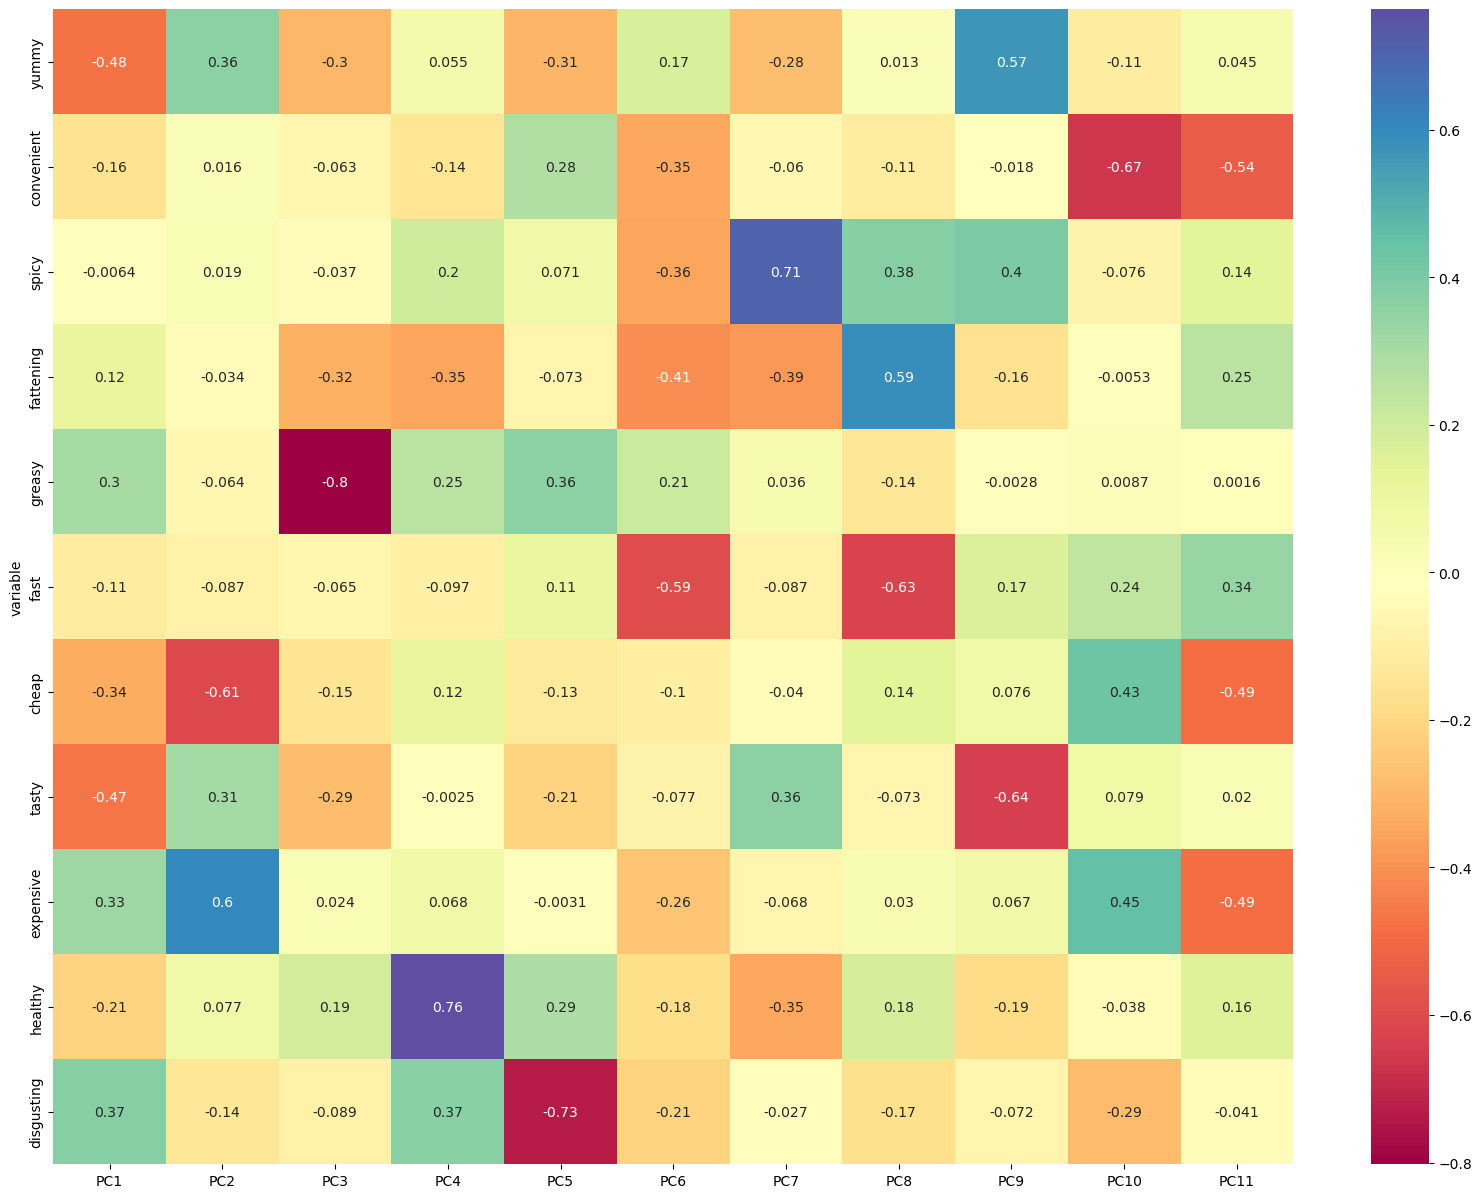

In [30]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

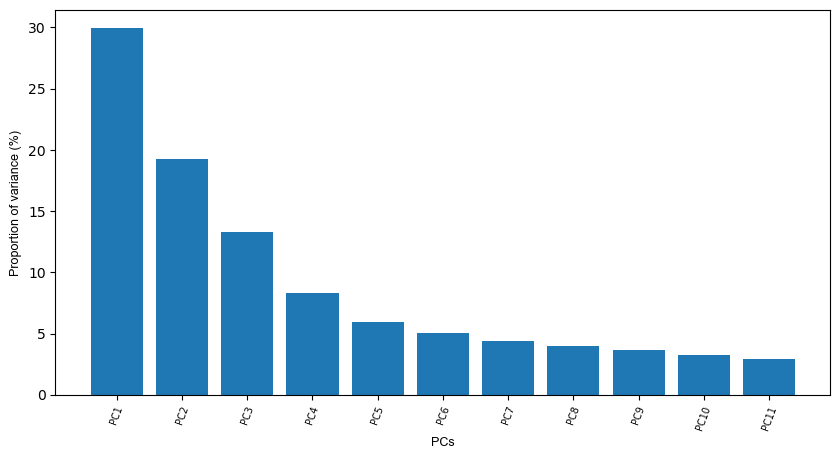

In [31]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

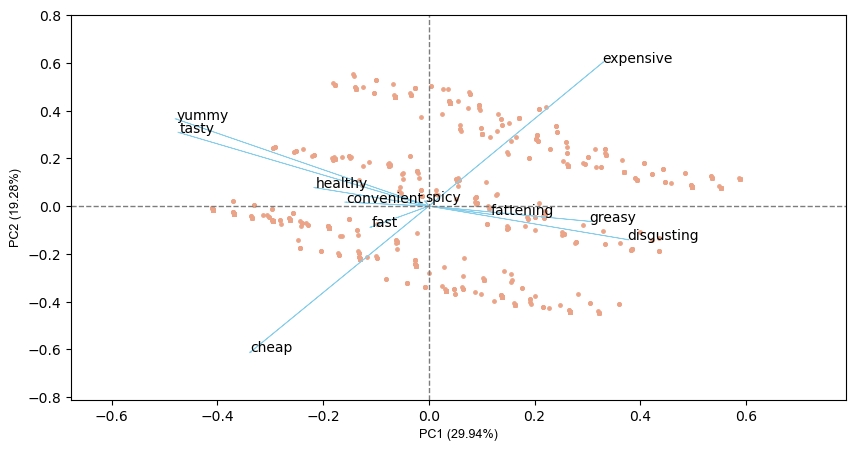

In [32]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [33]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 3 1 ... 1 3 1]
1748.9687521158035
9
[[2.70270270e-02 8.47972973e-01 6.08108108e-02 9.05405405e-01
  6.11486486e-01 9.29054054e-01 8.41216216e-01 6.66133815e-16
  5.40540541e-02 8.10810811e-02 4.45945946e-01]
 [5.11627907e-01 8.43551797e-01 9.30232558e-02 9.06976744e-01
  6.19450317e-01 8.01268499e-01 2.11416490e-02 5.60253700e-01
  9.83086681e-01 1.33192389e-01 3.46723044e-01]
 [0.00000000e+00 9.61832061e-01 1.37404580e-01 8.70229008e-01
  5.19083969e-01 9.38931298e-01 8.39694656e-01 1.00000000e+00
  5.34351145e-02 1.45038168e-01 1.75572519e-01]
 [1.00000000e+00 9.81916817e-01 1.01265823e-01 8.11934901e-01
  4.03254973e-01 9.60216998e-01 9.05967450e-01 9.76491863e-01
  5.78661844e-02 3.30922242e-01 6.14828210e-02]]


C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [34]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 296, 3: 553, 1: 473, 2: 131})

In [35]:
# Assuming 'cluster_num' and 'Like' are columns in your DataFrame
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Get unique values in the 'Like' column and sort them
like_values = sorted(df['Like'].unique())

# Reorder columns based on the sorted unique values
crosstab = crosstab[like_values]

# Display the reordered crosstab
print(crosstab)


Like          +5  -1  -2  -3  -4  -5   0   1   2    3    4
cluster_num                                               
0              0  22  27  36  37  71  44  19  27   12    1
1             34  16  22  30  26  73  63  47  56   66   40
2              0  11   5   7   5   6  29  34  20   10    4
3            109   9   5   0   3   2  33  52  84  141  115


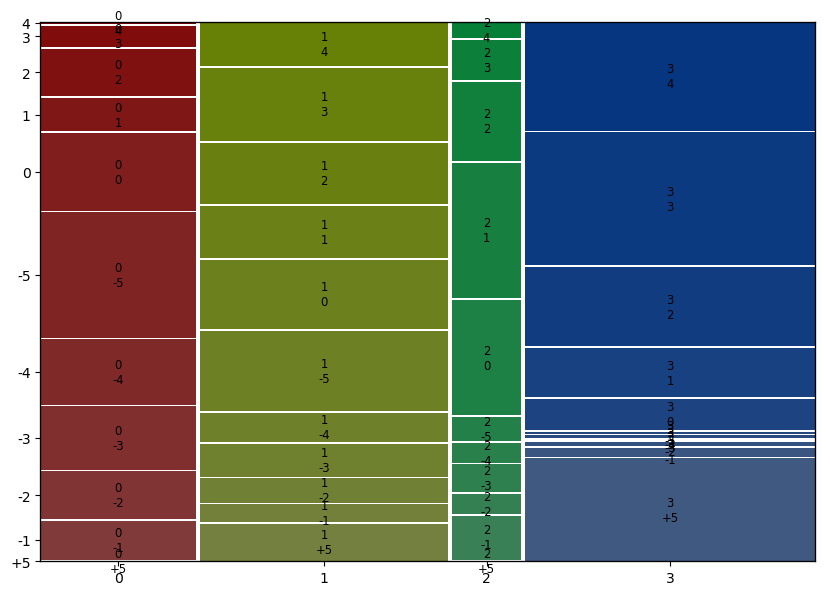

In [37]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['figure.figsize'] = (10, 7)

# Assuming crosstab is your DataFrame or data structure
mosaic(crosstab.stack())

plt.show()


In [38]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,168,128
1,214,259
2,75,56
3,331,222


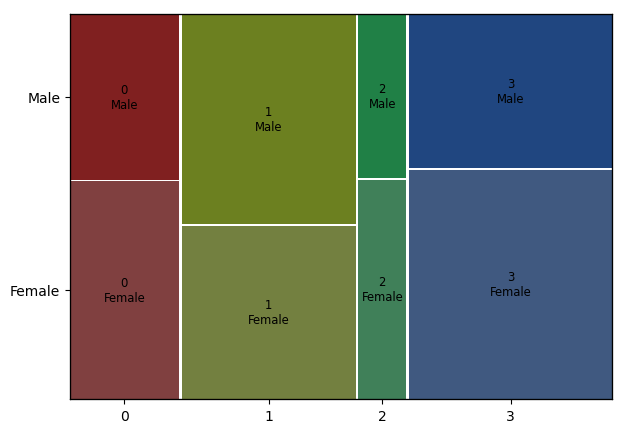

In [39]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

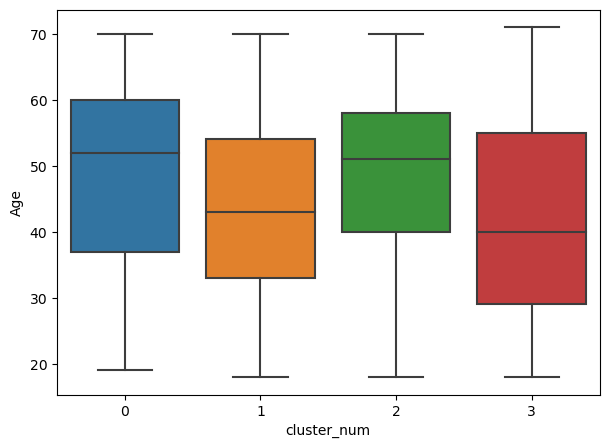

In [40]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

## Selecting target segment

In [41]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [42]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,4.790541
1,1,5.852008
2,2,6.061069
3,3,6.679928


In [43]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [44]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.432432,4.790541,2.787162
1,1,0.547569,5.852008,2.596195
2,2,0.427481,6.061069,2.618321
3,3,0.401447,6.679928,2.598553


##  Step 8: Selecting theTarget Segment(s)

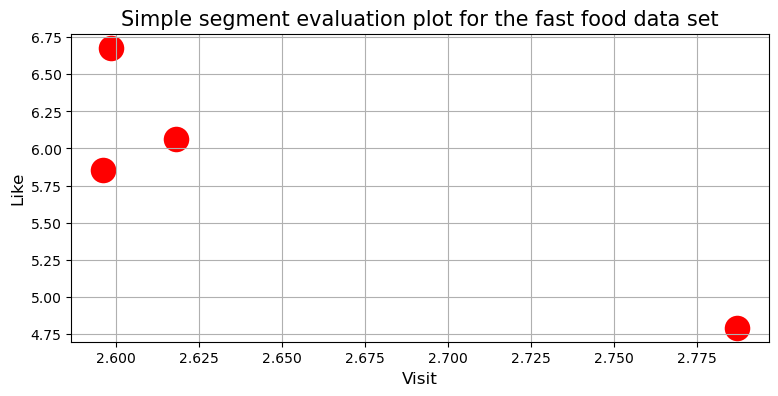

In [45]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.grid()
plt.show()

In [46]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

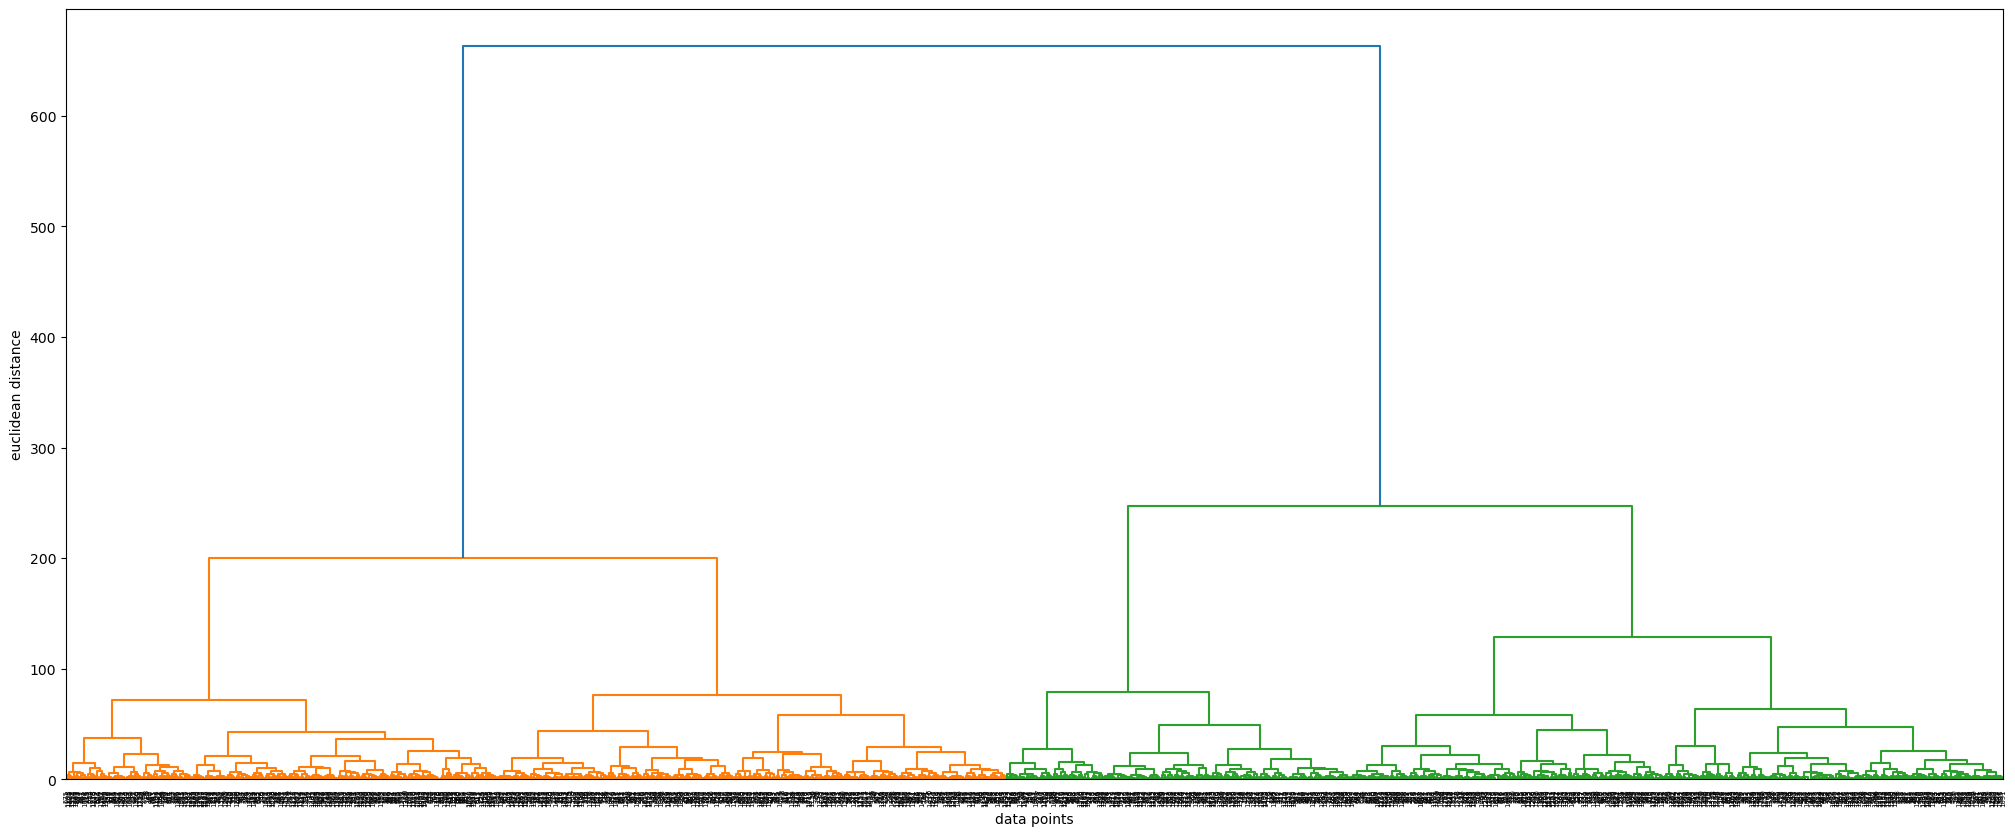

In [47]:
#create demogram and find the best clustering value
df_model = df.drop(['Gender'],axis=1)
merg = shc.linkage(df_model,method="ward")
plt.figure(figsize=(25,10))
shc.dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

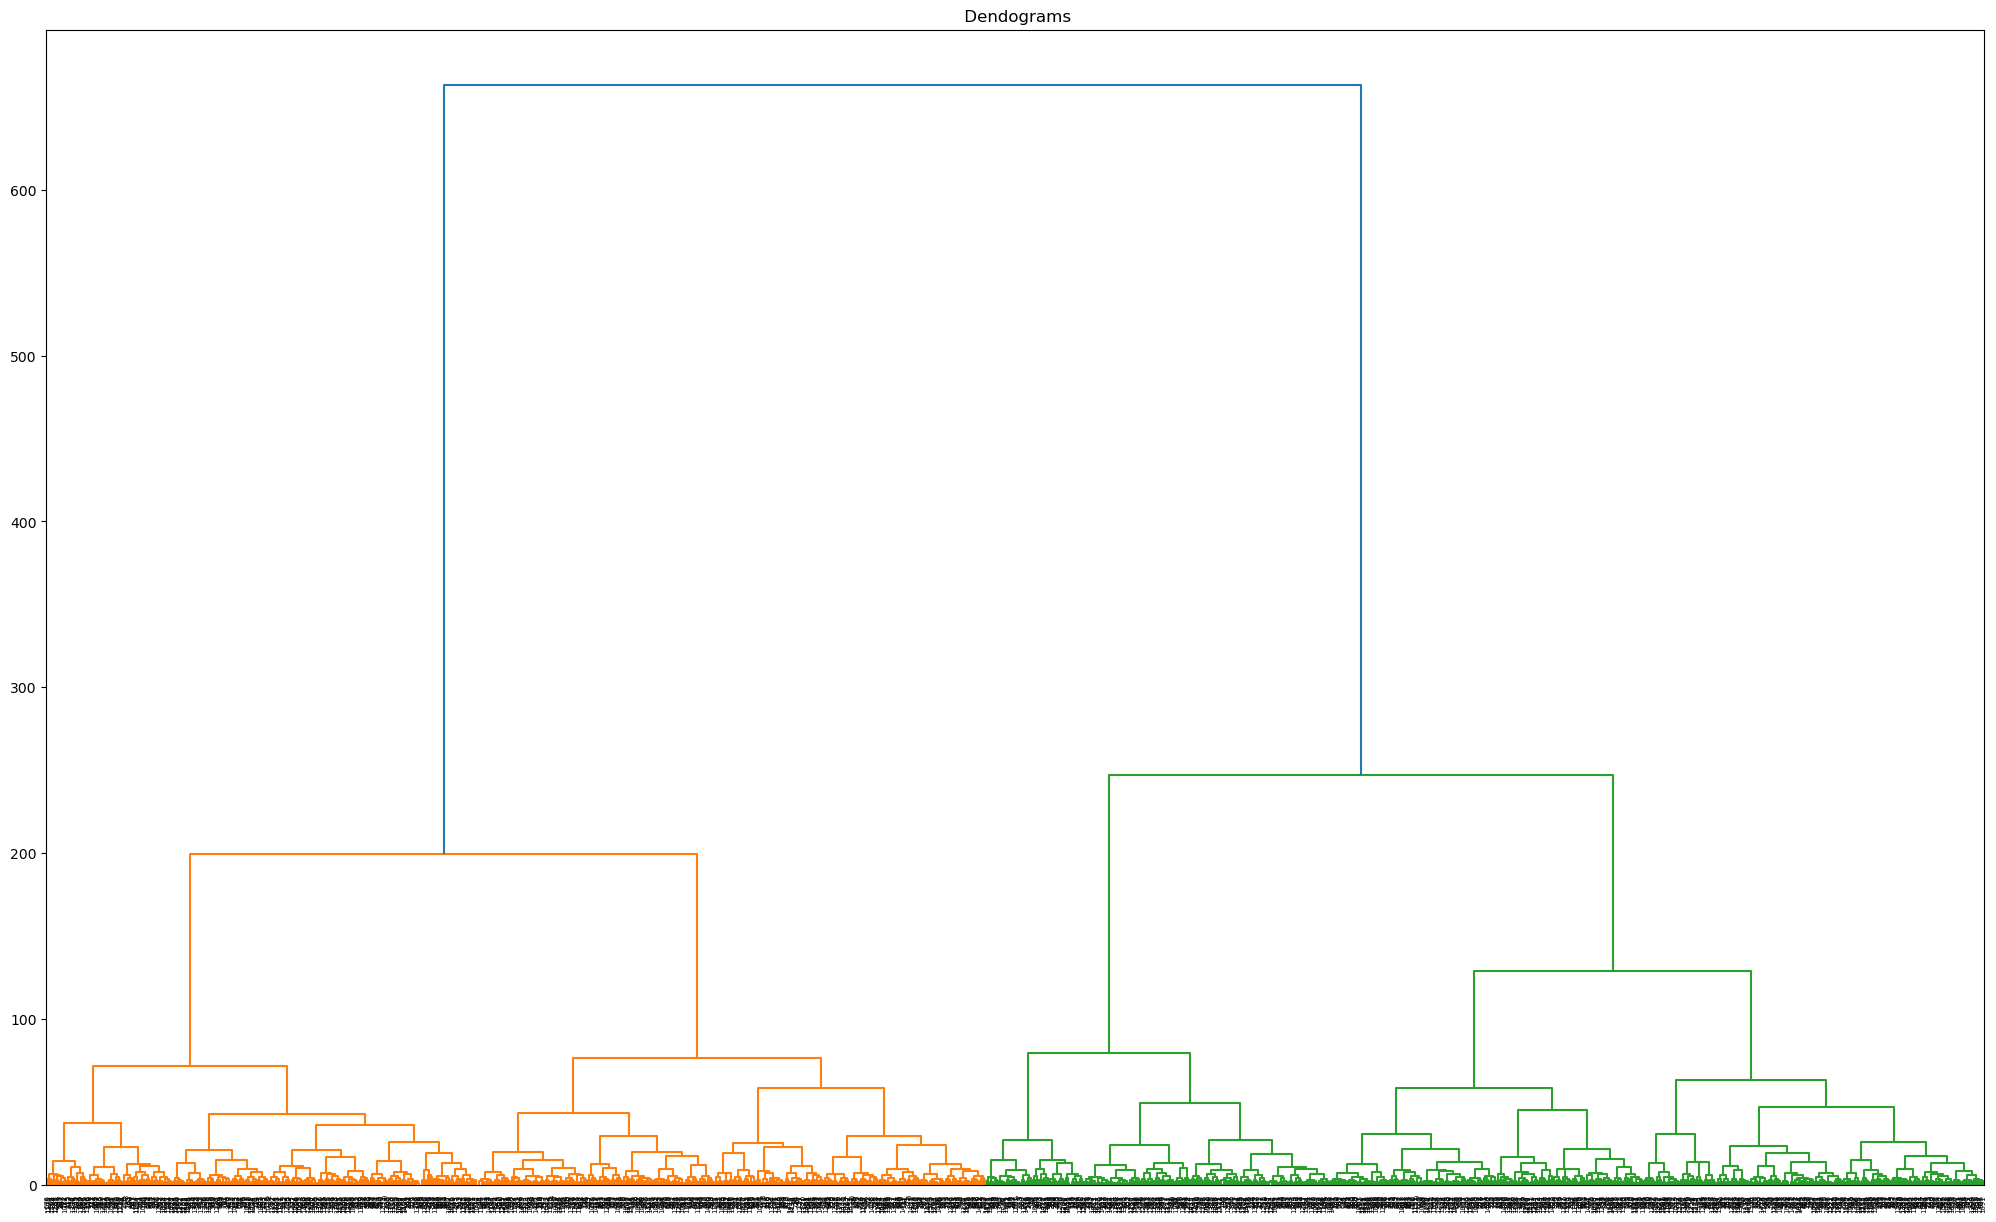

In [48]:
df_model = df.drop(['Gender'],axis=1)
plt.figure(figsize=(25, 15))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(df_model, method='ward'))

In [50]:
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters=4, linkage="ward")
cluster_labels = hiyerartical_cluster.fit_predict(df_model)

# Now you can use 'cluster_labels' for further analysis or visualization


C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


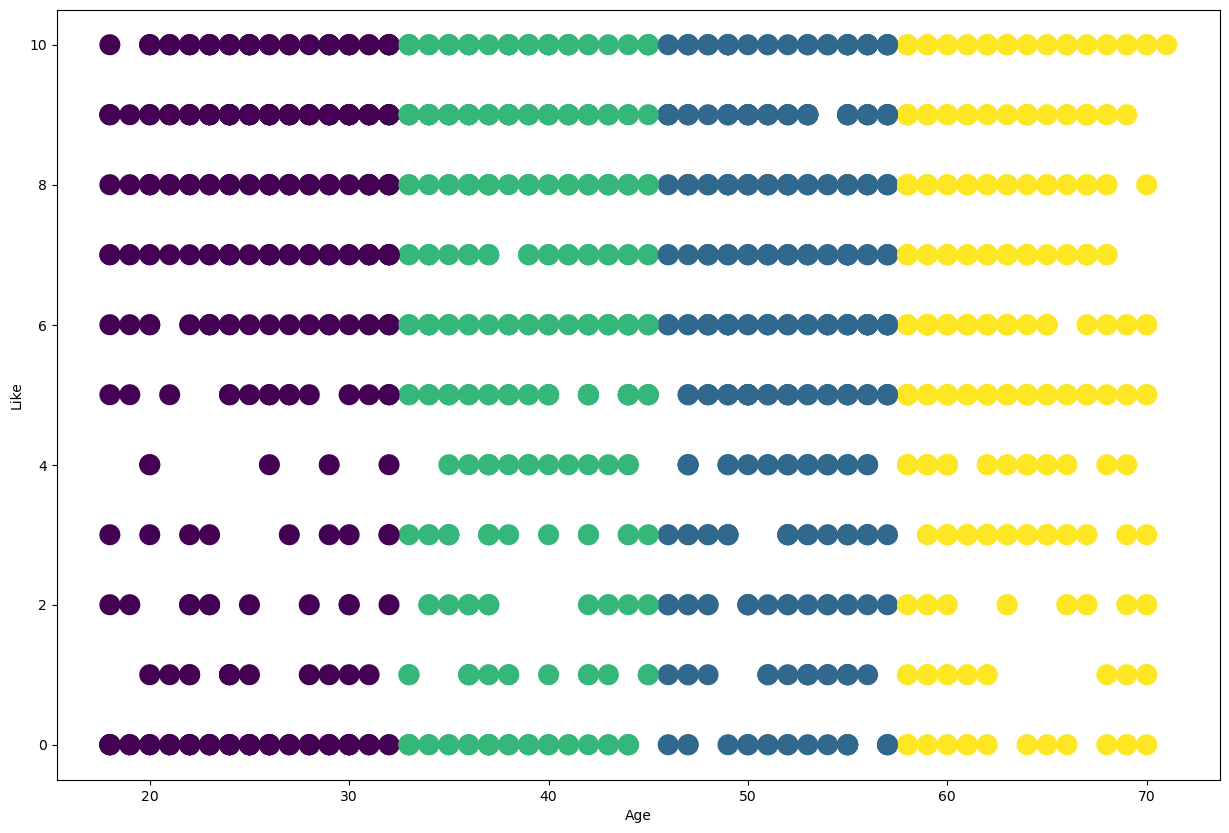

In [51]:
#create model
kmeans = KMeans(n_clusters=4)
df_predict = kmeans.fit_predict(df_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'Like' , data = df_model , c = df_predict , s = 200 )
plt.xlabel("Age")
plt.ylabel("Like")
plt.show()

In [52]:
df_predict

array([3, 1, 3, ..., 1, 2, 0])